## Exercise 1
• a well established and diffused method for detecting a disease in blood fails to detect the presence
of disease in 15% of the patients that actually have the disease.

• A young UniPD startUp has developed an innovative method of screening. During the qualification
phase, a random sample of n = 75 patients known to have the disease is screened using the new
method.

(a) what is the probability distribution of y, the number of times the new method fails to detect the
disease ?<br>
(b) on the n = 75 patients sample, the new method fails to detect the disease in y = 6 cases. What is
the frequentist estimator of the failure probability of the new method ?<br>
(c) setup a bayesian computation of the posterior probability, assuming a beta distribution with mean
value 0.15 and standard deviation 0.14. Plot the posterior distribution for y, and mark on the plot
the mean value and variance<br>
(d) Perform a test of hypothesis assuming that if the probability of failing to the detect the desease
in ill patients is greater or equal than 15%, the new test is no better that the traditional method.
Test the sample at a 5% level of significance in the Bayesian way.<br>
(e) Perform the same hypothesis test in the classical frequentist way.<br>


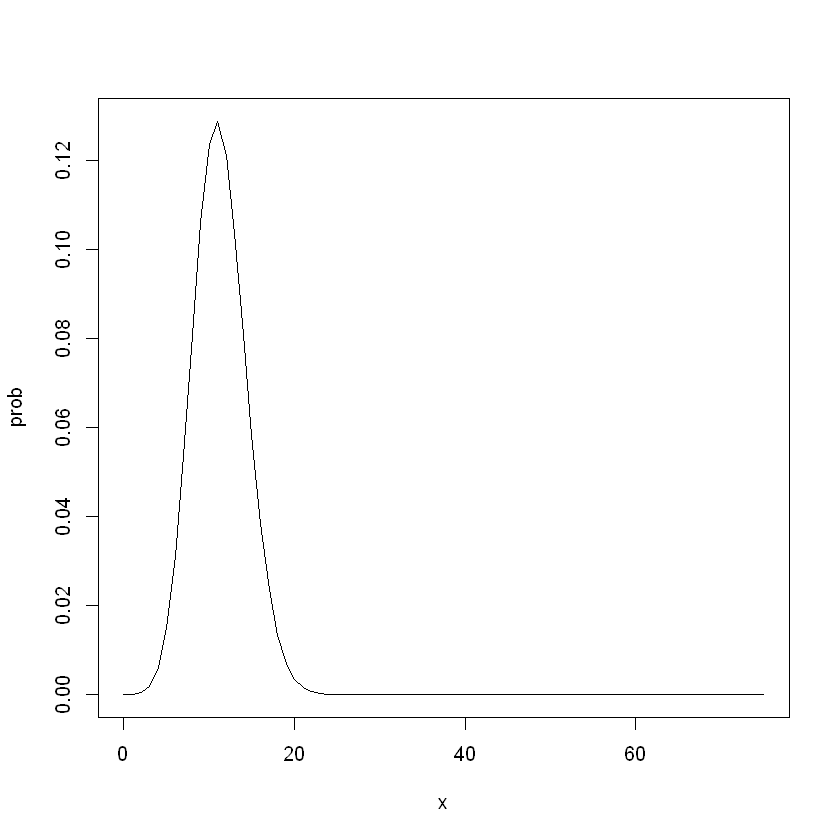

In [2]:
## For the first part we can generate a binomial centred at 15%

x <- seq(0,75,by= 1)
prob <- dbinom(x,75,0.15)
plot(x,prob, type='l')

In [3]:
## Now we want to do a Frequentist Estimator 
n <- 75
y <- 6
## For the frequentist approach, an unbiased estimator is:
p <- y/n


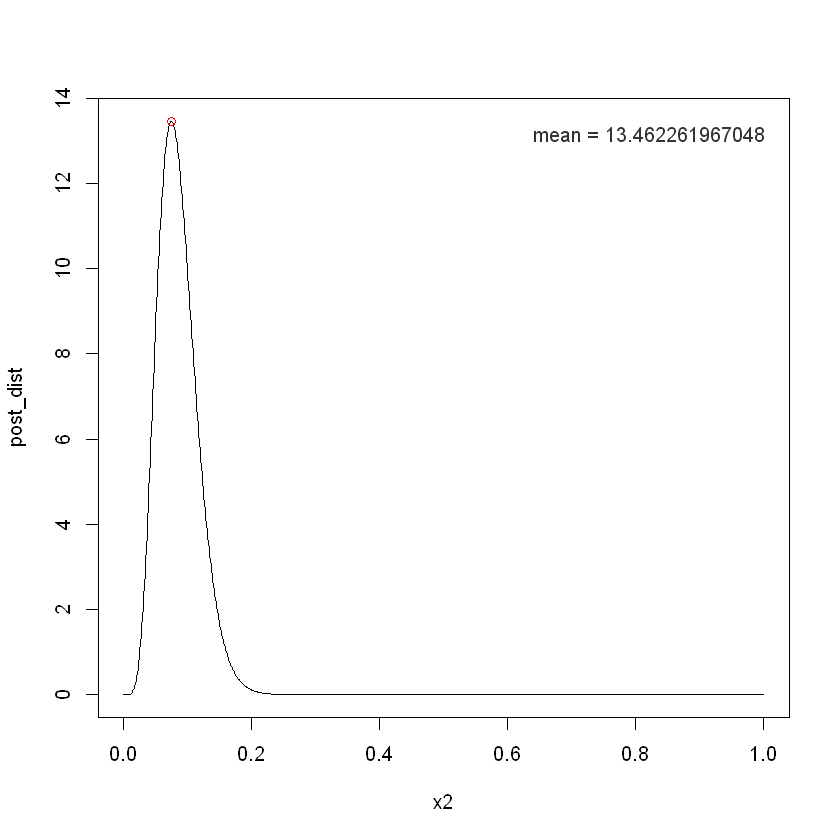

In [4]:
## beta distribution with mean value 0.15 and standard deviation 0.14
## Lets calculate alpha and beta and save them in variables
alpha <- 3237/3920
beta  <- 18343/3920
#Now lets find the posterior

post_alpha <- 3237/3920 + y
post_beta <- 18343/3920 +n -y
x2 <- seq(0,1,by = 0.001)
post_dist <- dbeta(x2,post_alpha ,post_beta)

plot(x2,post_dist,type='l')
points(x2[which(max(post_dist) == post_dist )],max(post_dist),col = "red")
mtext(paste("mean =", max(post_dist), '   '),3, adj=1, line=-2, col = "grey20")
mtext(paste("mean =", max(post_dist), '   '),3, adj=1, line=-2, col = "grey20")

In [5]:
## Bayesian Hypothesis test
prob <- integrate(dbeta , 0, 0.15,shape1=post_alpha,shape2= post_beta)

cat("We find that the integral value is" ,prob$value, "So we cant reject the null hypothesis")

We find that the integral value is 0.9687207 So we cant reject the null hypothesis

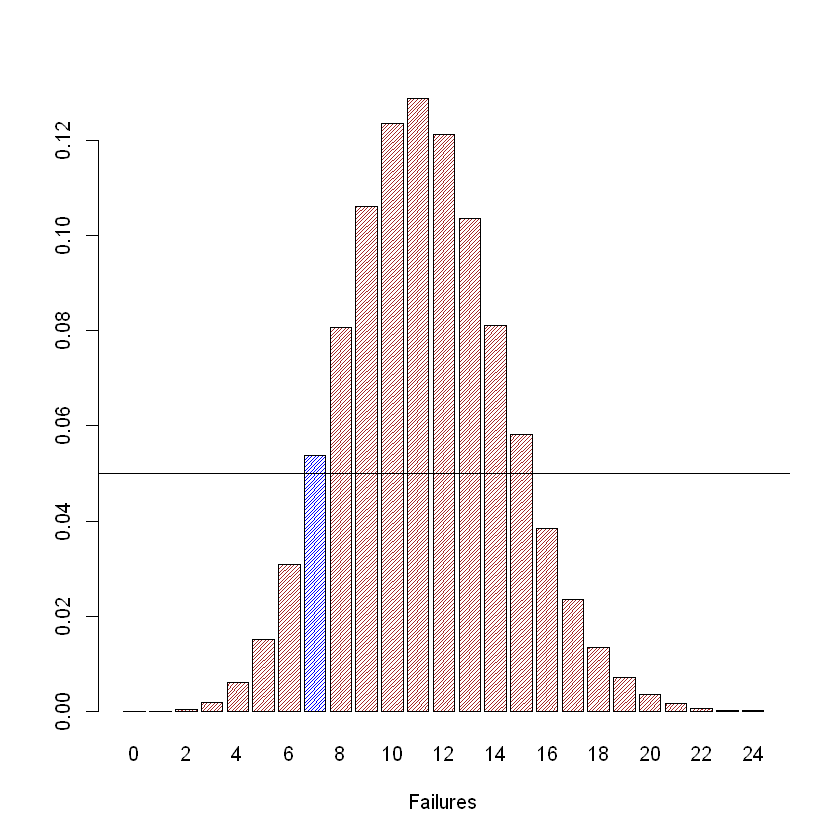

In [26]:
## Frequentist hypothesis test
## Ho: p <= 0.15 meaning the new treatment is worse than the current one
dist_binom <- dbinom(x[0:25],size = 75,prob = 0.15)
vec <- c(rep("brown", 7),"blue" ,rep("brown", 8))
barplot(dist_binom,names =x[0:25] ,xlab = "Failures",density = 50,col= vec)
abline(h = 0.05)

#y = 7 lies inside the acceptance region, so we cant reject the null hypothesis

### Excercise 2
• Ladislaus Josephovich Bortkiewicz was a Russian economist and statistician. He noted that the
Poisson distribution can be very useful in applied statistics when describing low-frequency events
in a large population. In a famous example he showed that the number of deaths by horse kick
among the Prussian army follows the Poisson distribution.

• Considering the following to sets of observations taken over a fixed large time interval in two different
corps:


| y death soldiers | 0 | 1 | 2 | 3 | 4 | > 5 |
| :- | -: | -: |-: |-: |-: |-: |
| n1 Observations | 109 | 65 |22 |3 |1 |0 |
| n2 Observations | 114 | 91 |32 |11 |2 |0 |

(a) assuming a uniform prior, compute and plot the posterior distribution for λ, the death rate over
the measurement time. Determine the posterior mean, median and variance, and compute the 95%
credibility interval.

(b) assuming now a Jeffreys’ prior,

$$ g(\lambda) \propto 1/\sqrt{\lambda}, with \lambda >0 $$
compute and plot the posterior distribution for λ, the death rate over the measurement time.
Determine the posterior mean, median and variance, and compute the 95% credibility interval.



In [28]:
n1 <- c(109,65,22,3,1,0)
n2 <- c(114,91,32,11,2,0)
#We get the full grid of observerations for each time interval
n1_full <- c(rep(0,109),rep(1,65),rep(2,22),rep(3,3),rep(4,1))
n2_full <- c(rep(0,114),rep(1,91),rep(2,32),rep(3,11),rep(4,2))

In [36]:
cat('We have',length(n1_full), 'Observations in Corp 1 and ')
cat(length(n2_full), 'Observations in Corp 2')

We have 200 Observations in Corp 1 and 250 Observations in Corp 2

In [84]:
#As the material indicates, the posterior it’s a Gamma function with alpha = sum(y) + 1 and gamma = n
plot_post <- function(obs, prior ="uni",plot =TRUE){
    
    y<- obs
n <- length(y)
if (prior == "uni"){
    
alpha <- sum(y)+1
gamma <- n
}else{
alpha <- sum(y)+1/2
gamma <- n 
    
}

if (plot == TRUE){
    p <- seq(0,1, length.out = 1000)
p.posterior <- dgamma(p, alpha,gamma)
plot(p, p.posterior , xaxs="i", yaxs="i",
col="navy", type="l", lty=1, lwd = 3,
ylim = c(0,max(p.posterior)*1.1),
xlim = c(0,1),
xlab="p", ylab=paste("P(p | M)"),
main=paste("Gamma(",alpha ,",",gamma ,")"))

    
}
return(c(alpha,gamma))
}



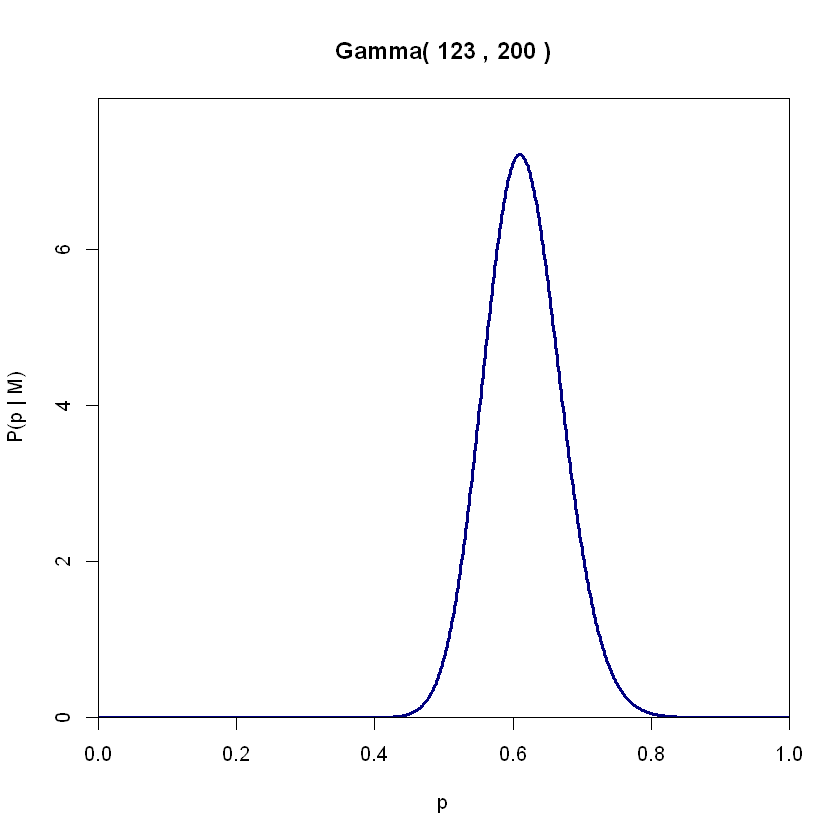

In [85]:
alphabeta <-plot_post(n1_full)

In [74]:
#Now we analize the posterior
gamma_interesting <- function(alpha,gamma){
    conf <- 0.05
    dist = rgamma(n=10000, alpha,gamma)
    expec <- weighted.mean(dist)
    media <- median(dist)
    mode  <- unique(dist)[which.max(tabulate(match(dist, unique(dist))))]
    stn   <- sd(dist)
    q_lower <- qgamma(conf / 2, alpha , gamma)
    q_upper <- qgamma(1 - conf / 2, alpha , gamma)
    return(list(expec,media,mode,stn,q_lower,q_upper))    
    
}


In [86]:
results <- data.frame(matrix(ncol = 9, nrow = 0))

colnames(results) <- c("Prior","Alpha", "Gamma", "Mean","Median", "Mode","Standard Deviation","Min Confidence","Max Confidence")
results[1,] <- append(list("Uniform",alphabeta[1],alphabeta[2]),gamma_interesting(alphabeta[1],alphabeta[2]))
results

,Prior,Alpha,Gamma,Mean,Median,Mode,Standard Deviation,Min Confidence,Max Confidence
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Uniform,123,200,0.613652,0.6117827,0.6493591,0.0555424,0.5111251,0.7283408


In [87]:
alphabeta <-plot_post(n1_full,prior= "jeff",plot=FALSE)
results[2,] <- append(list("Jeffrey",alphabeta[1],alphabeta[2]),gamma_interesting(alphabeta[1],alphabeta[2]))
results

,Prior,Alpha,Gamma,Mean,Median,Mode,Standard Deviation,Min Confidence,Max Confidence
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Uniform,123.0,200,0.6136520,0.6117827,0.6493591,0.05554240,0.5111251,0.7283408
2,Jeffrey,122.5,200,0.6123465,0.6102418,0.6199457,0.05575202,0.5088464,0.7256196


In [89]:
#Now lets do the same for the second corp 
alphabeta <-plot_post(n2_full,prior= "uni",plot=FALSE)
results[3,] <- append(list("Uniform",alphabeta[1],alphabeta[2]),gamma_interesting(alphabeta[1],alphabeta[2]))

alphabeta <-plot_post(n2_full,prior= "jeff",plot=FALSE)
results[4,] <- append(list("Jeffrey",alphabeta[1],alphabeta[2]),gamma_interesting(alphabeta[1],alphabeta[2]))
results

,Prior,Alpha,Gamma,Mean,Median,Mode,Standard Deviation,Min Confidence,Max Confidence
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Uniform,123.0,200,0.6136520,0.6117827,0.6493591,0.05554240,0.5111251,0.7283408
2,Jeffrey,122.5,200,0.6123465,0.6102418,0.6199457,0.05575202,0.5088464,0.7256196
3,Uniform,197.0,250,0.7884838,0.7874137,0.8324738,0.05598116,0.6817986,0.9017759
4,Jeffrey,196.5,250,0.7856048,0.7848029,0.7722491,0.05631059,0.6799384,0.8996361


### Excersise 3

A study on water quality of streams, a high level of bacter X was defined as a level greater than 100
per 100 ml of stream water. n = 116 samples were taken from streams having a high environmental
impact on pandas. Out of these, y = 11 had a high bacter X level.
• indicating with p the probability that a sample of water taken from the stream has a high bacter
X level, <br>
(a) find the frequentist estimator for p<br>
(b) using a Beta(1, 10) prior for p, calculate and posterior distribution P(p| y)<br>
(c) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval<br>
(d) test the hypotesis<br>
H◦ : p = 0.1 versus H1 : p 6= 0.1<br>
at 5% level of significance with both the frequentist and bayesian approach<br>



In [3]:
## Now we want to do a Frequentist Estimator 
n <- 116
y <- 11
## For the frequentist approach, an unbiased estimator is:
p <- y/n

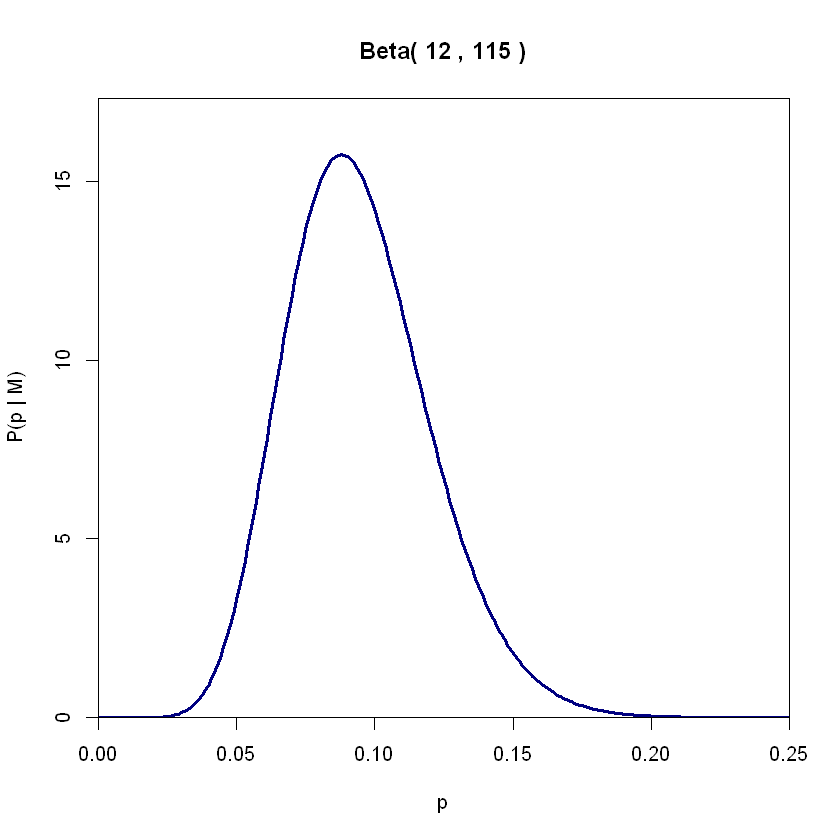

In [18]:
alpha<-1
beta <-10
p <- seq(0,1, length.out = 1000)
p.posterior <- dbeta(p, alpha+y , beta+n-y)

plot(p, p.posterior , xaxs="i", yaxs="i",
col="navy", type="l", lty=1, lwd = 3,
ylim = c(0,max(p.posterior)*1.1),
xlim = c(0,0.25),
xlab="p", ylab=paste("P(p | M)"),
main=paste("Beta(",alpha+y ,",",beta+n-y ,")"))

The mean is 0.09448819 While the variance is 0.0007150888

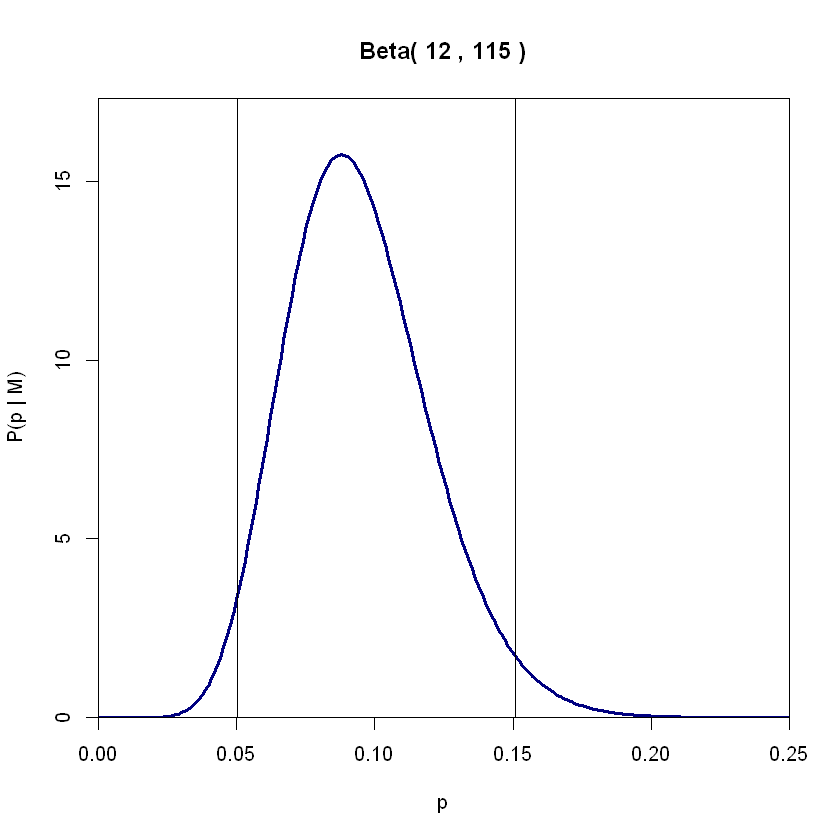

In [23]:
## For the bayesian estimator we need to calculate the posterior mean:
p <- y/n
pb <- (alpha+y )/(alpha+y  +beta+n-y )

## Now the posterior Variance

varpb <- (1/(n+2))**2 * n*p*(1-p)
#Now lets show the confidence intervals
p <- seq(0,1, length.out = 1000)
p.posterior <- dbeta(p, alpha+y , beta+n-y)
conf <-  0.05
plot(p, p.posterior , xaxs="i", yaxs="i",
col="navy", type="l", lty=1, lwd = 3,
ylim = c(0,max(p.posterior)*1.1),
xlim = c(0,0.25),
xlab="p", ylab=paste("P(p | M)"),
    
main=paste("Beta(",alpha+y ,",",beta+n-y ,")"))
q_lower <- qbeta(conf / 2, alpha+y , beta+n-y)
q_upper <- qbeta(1 - conf / 2, alpha+y , beta+n-y)

abline(v = q_lower)
abline(v = q_upper)
cat("The mean is",pb,"While the variance is",varpb)

In [24]:
#Bayesian Hypothesis test

prob <- integrate(dbeta , 0, 0.10,shape1=alpha+y,shape2= beta+n-y)

cat("We find that the integral value is" ,prob$value, "So we cant reject the null hypothesis")

We find that the integral value is 0.614185 So we cant reject the null hypothesis

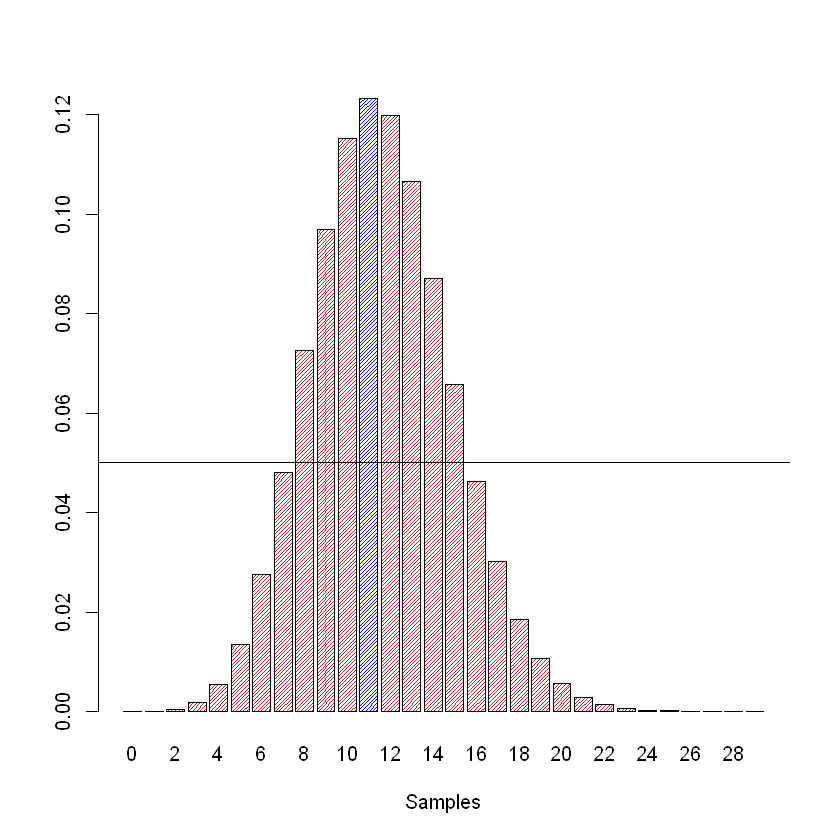

In [1]:
## Frequentist hypothesis test
## Ho: p <= 0.1
x <- seq(0,116,by= 1)
dist_binom <- dbinom(x[0:30],size = 116,prob = 0.1)

vec <- c(rep("brown", 11),"blue" ,rep("brown", 100))
barplot(dist_binom,names = x[0:30], xlab = "Samples",density = 50,col= vec
       )
abline(h = 0.05)

#y = 11 lies inside the acceptance region, so we cant reject the null hypothesis

### Part 2:

• a new measurement, performed one month later on n = 165 water samples, gives y = 9 high bacter X level
(e) find the frequentist estimator for p<br>
(f) find a bayesian estimator for p, assuming both a Beta(1, 10) prior for p, and assuming the posterior
probability of the older measurement as the prior for the new one.<br>
(g) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval<br>
(h) test the hypotesis<br>
H◦ : p = 0.1 versus H1 : p 6= 0.1<br>
at 5% level of significance with both the frequentist and bayesian approach<br>

In [2]:
## Now we want to do a Frequentist Estimator 
n <- 165
y <- 9
## For the frequentist approach, an unbiased estimator is:
p <- y/n

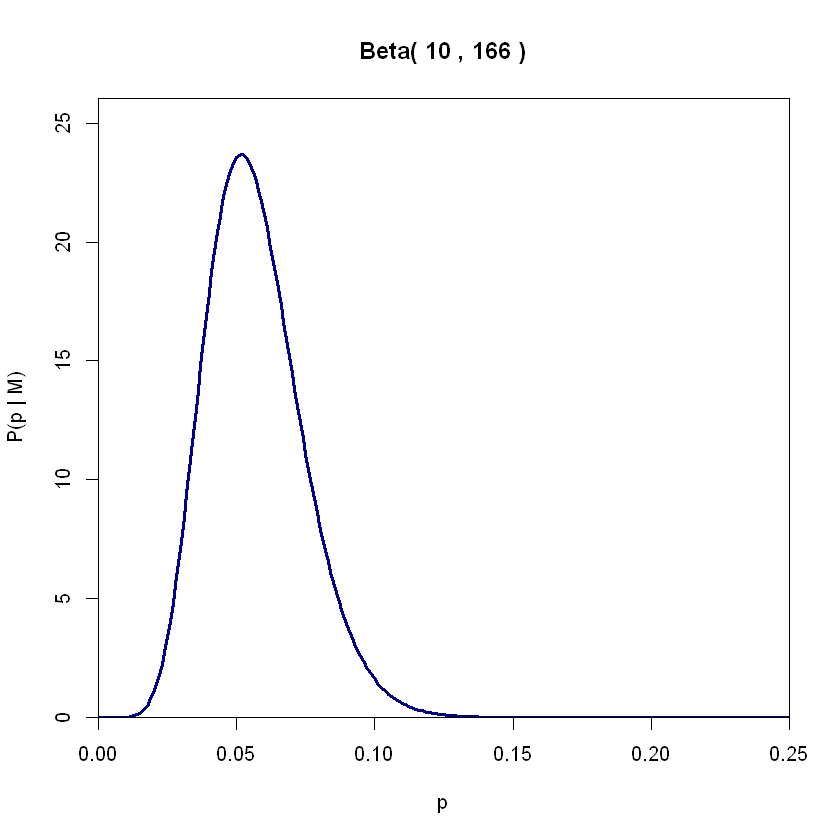

In [3]:
alpha<-1
beta <-10
p <- seq(0,1, length.out = 1000)
p.posterior <- dbeta(p, alpha+y , beta+n-y)

plot(p, p.posterior , xaxs="i", yaxs="i",
col="navy", type="l", lty=1, lwd = 3,
ylim = c(0,max(p.posterior)*1.1),
xlim = c(0,0.25),
xlab="p", ylab=paste("P(p | M)"),
main=paste("Beta(",alpha+y ,",",beta+n-y ,")"))

The mean is 0.05681818 While the variance is 0.0003051056

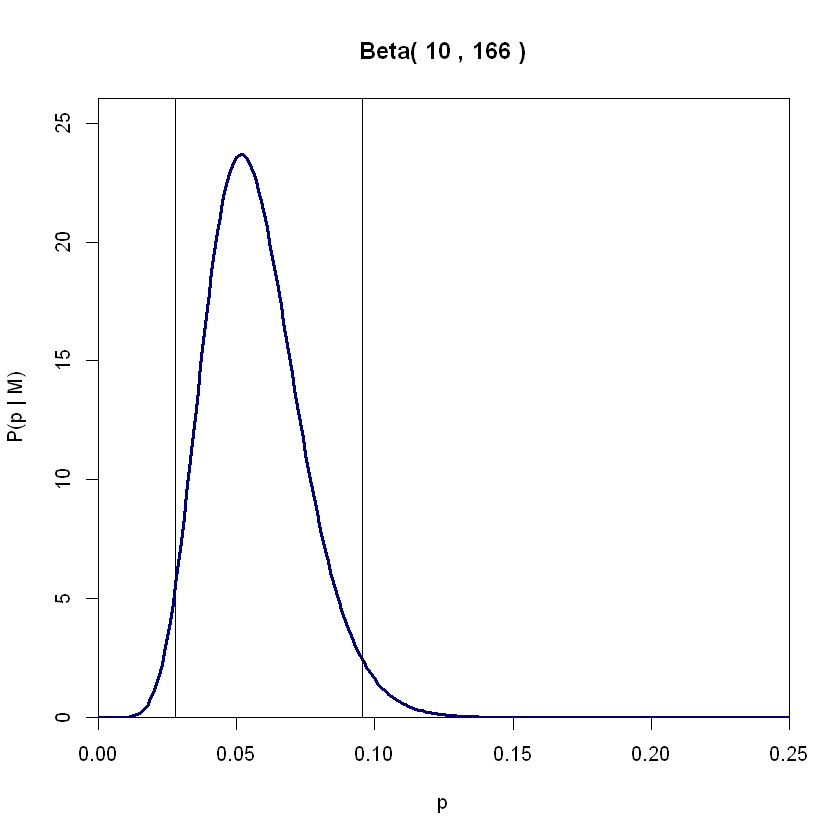

In [4]:
## For the bayesian estimator we need to calculate the posterior mean:
p <- y/n
pb <- (alpha+y )/(alpha+y  +beta+n-y )

## Now the posterior Variance

varpb <- (1/(n+2))**2 * n*p*(1-p)
#Now lets show the confidence intervals
p <- seq(0,1, length.out = 1000)
p.posterior <- dbeta(p, alpha+y , beta+n-y)
conf <-  0.05
plot(p, p.posterior , xaxs="i", yaxs="i",
col="navy", type="l", lty=1, lwd = 3,
ylim = c(0,max(p.posterior)*1.1),
xlim = c(0,0.25),
xlab="p", ylab=paste("P(p | M)"),
    
main=paste("Beta(",alpha+y ,",",beta+n-y ,")"))
q_lower <- qbeta(conf / 2, alpha+y , beta+n-y)
q_upper <- qbeta(1 - conf / 2, alpha+y , beta+n-y)

abline(v = q_lower)
abline(v = q_upper)
cat("The mean is",pb,"While the variance is",varpb)

In [5]:
#Bayesian Hypothesis test

prob <- integrate(dbeta , 0, 0.10,shape1=alpha+y,shape2= beta+n-y)

cat("We find that the integral value is" ,prob$value, "So we reject the null hypothesis")

We find that the integral value is 0.9842592 So we cant reject the null hypothesis

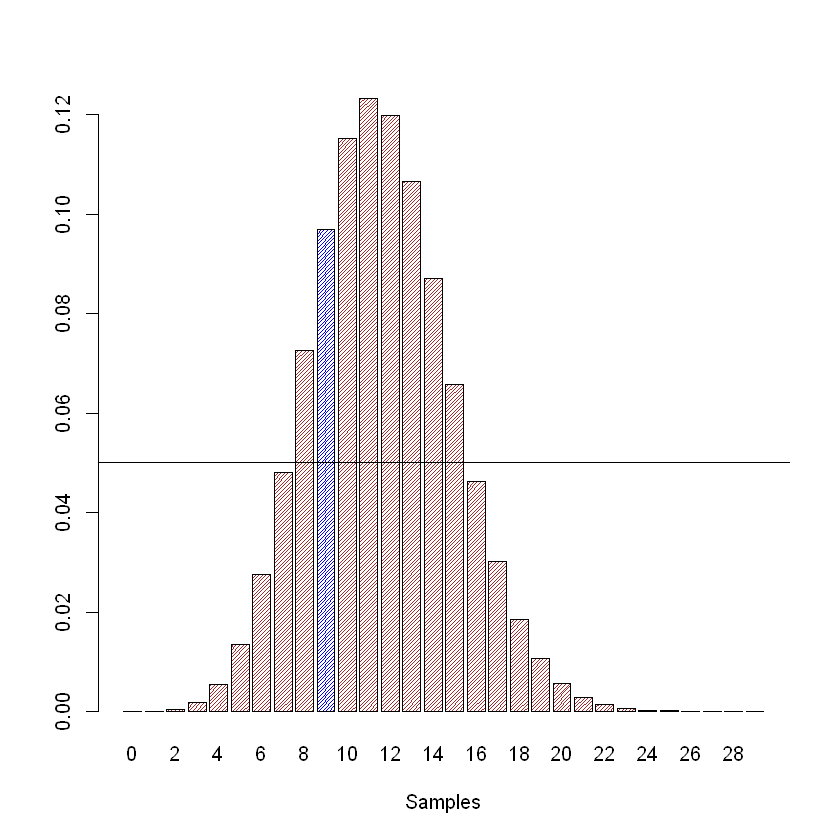

In [6]:
## Frequentist hypothesis test
## Ho: p <= 0.1
x <- seq(0,116,by= 1)
dist_binom <- dbinom(x[0:30],size = 116,prob = 0.1)

vec <- c(rep("brown", 9),"blue" ,rep("brown", 100))
barplot(dist_binom,names = x[0:30], xlab = "Samples",density = 50,col= vec
       )
abline(h = 0.05)

#y = 9 lies inside the acceptance region, so we cant reject the null hypothesis

### JAGS Exercises

In [15]:
library(rjags)
set.seed(20190522)
#
# Generate the observed data
data_size <- 100
data_mu <- 10
data_sigma <- 1
data_obs <- rnorm(data_size , data_mu , data_sigma)
# - Specify the Generative Model with BUGS
model <- "s11_norm_pred.bug"
# Our data for the model
data <- NULL
data$X <- data_obs # Set of observations
# Create the model and pass the parameters
jm <- jags.model(model , data)
# Update the Markov chain (Burn -in)
update(jm , 1000)
chain <- coda.samples(jm , c("mu", "sigma", "Y"), n.iter=10000)
print(summary(chain ))

ERROR: Error: package or namespace load failed for 'rjags':
 .onLoad failed in loadNamespace() for 'rjags', details:
  call: inDL(x, as.logical(local), as.logical(now), ...)
  error: unable to load shared object 'C:/Users/gianm/Documents/R/win-library/4.1/rjags/libs/x64/rjags.dll':
  LoadLibrary failure:  The specified procedure could not be found.



In [12]:
install.packages("rjags")

Installing package into 'C:/Users/gianm/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'rjags' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\gianm\AppData\Local\Temp\RtmpeIfCAE\downloaded_packages


In [14]:
Sys.setenv(JAGS_HOME="C:/Program Files/JAGS/JAGS-4.3.1")